In [0]:
from pyspark.sql.functions import col,asc, desc, avg, count
#from pyspark.sql.functions import col,asc, unix_timestamp, lag, when, floor, desc, avg, count
#from pyspark.sql.window import Window
#from pyspark.sql.functions import sum as spark_sum
#from pyspark.sql.types import IntegerType
import numpy as np
#import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# read all files
df1 = spark.table("file1_1_csv")
df2 = spark.table("file2_csv")
df3 = spark.table("file3_1_csv")
df4 = spark.table("file4_csv")
df5 = spark.table("file5_2_csv")

In [0]:
#join all files and sort by index
joined_df = df1.join(df3, on="index" , how="left")
joined_df = joined_df.join(df4, on="index" , how="left")
joined_df = joined_df.join(df5, on="index" , how="left")
joined_df = joined_df.join(df2, on="index" , how="left")
sorted_df = joined_df.orderBy(asc("index"))

In [0]:
#replace null with 0
dfNullReplaced = sorted_df.fillna(0)

In [0]:
#Analyzing Error Codes (dtc)
dtc_counts = dfNullReplaced.groupBy("dtc").count().orderBy("count", ascending=False)
display(dtc_counts)

dtc,count
0.0,6208799
255.0,1005896


In [0]:
# Group the filtered DataFrame by "tripID" and "gps_speed", then count the occurrences
max_speed_grouped_df = dfNullReplaced.groupBy("gps_speed").agg(count("*").alias("count"))

max_speed_sorted_df = max_speed_grouped_df.orderBy(desc("gps_speed"))
max_speed_sorted_df = max_speed_sorted_df.limit(30)

# Display the grouped DataFrame
display(max_speed_sorted_df)


gps_speed,count
333.2,574
323.61,1
276.58,1
268.26,1
231.31,1
215.52,1
184.98,1
181.18,1
175.64,1
171.77,1


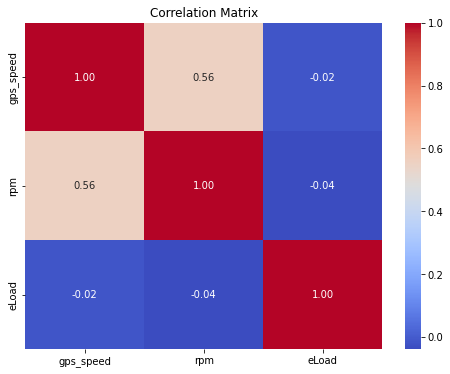

In [0]:
#Correlation Analysis
# Select relevant columns for correlation analysis
correlation_df = dfNullReplaced.select("gps_speed", "rpm", "eLoad")

# Calculate correlation matrix
correlation_matrix = correlation_df.toPandas().corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

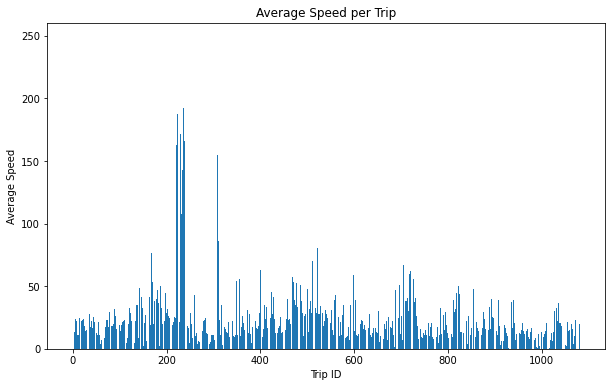

In [0]:
#Feature Engineering
feature_engineering_df = dfNullReplaced.groupBy("tripID").agg(avg("speed").alias("avg_speed"), avg("battery").alias("avg_battery_voltage"))

# Convert to Pandas DataFrame for visualization
feature_engineering_pd_df = feature_engineering_df.toPandas()

# Plot average speed per trip
plt.figure(figsize=(10, 6))
plt.bar(feature_engineering_pd_df["tripID"], feature_engineering_pd_df["avg_speed"])
plt.xlabel("Trip ID")
plt.ylabel("Average Speed")
plt.title("Average Speed per Trip")
plt.show()

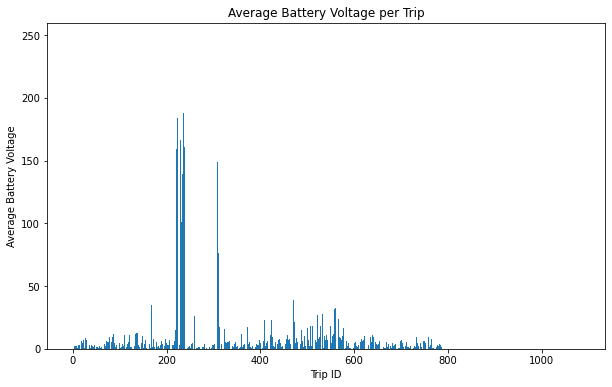

In [0]:
# Plot average battery voltage per trip
plt.figure(figsize=(10, 6))
plt.bar(feature_engineering_pd_df["tripID"], feature_engineering_pd_df["avg_battery_voltage"])
plt.xlabel("Trip ID")
plt.ylabel("Average Battery Voltage")
plt.title("Average Battery Voltage per Trip")
plt.show()